In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from PIL import Image 
import scipy.stats as stats

%matplotlib

Using matplotlib backend: MacOSX


In [4]:
## Isabel
fname1 = 'isabel_pressure.png'
fname2 = 'isabel_vel.png'

In [3]:
## Loading data
width, height = Image.open(fname1).size
print ('Image width, height: ' + str(width) + ', ' + str(height))

img_1 = img_as_float(Image.open(fname1))
img_2 = img_as_float(Image.open(fname2))

img1 = np.zeros((height,width), dtype=float)
img2 = np.zeros((height,width), dtype=float)

img1 = rgb2gray(img_1)
img2 = rgb2gray(img_2)
        
## combine two images to a single 2D array
img = np.stack((img1,img2),axis=-1)

Image width, height: 512, 512


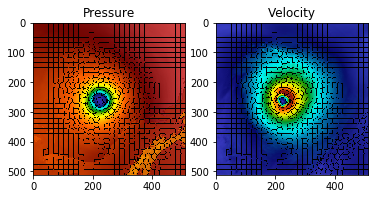

In [4]:
n_segments = 900
segments_slic = slic(img, n_segments=n_segments, compactness=0.2, sigma=1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(mark_boundaries(img_1, segments_slic, color=(0,0,0)))
ax[0].set_title("Pressure")
ax[1].imshow(mark_boundaries(img_2, segments_slic, color=(0,0,0)))
ax[1].set_title("Velocity")

#ax[1].imshow(segments_slic, cmap=plt.get_cmap('tab20b_r'))
plt.show()

In [5]:
cluster_groups = []
c_means = []
c_std = []

for i in range(n_segments):
    cluster_groups.append([])

for i in range(height):
    for j in range(width):
        cid = segments_slic[i][j]
        cluster_groups[cid].append(img1[i][j])
        
for i in range(len(cluster_groups)):
    if len(cluster_groups[i]) > 0:
        c_means.append(np.mean(cluster_groups[i]))
        c_std.append(np.std(cluster_groups[i]))
    else:
        c_means.append(0)
        c_std.append(0)        

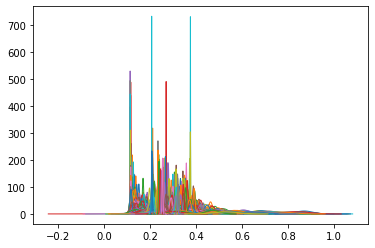

In [6]:
## plot in loops all the dists
sigma_dist=3.5
numtrials=100
for i in range(n_segments):
    
    if (c_std[i]>0.0):
        index = i
        mu, sigma = c_means[index], c_std[index]
        min_val = (mu-sigma_dist*sigma)
        max_val = (mu+sigma_dist*sigma)
        x = np.arange(min_val, max_val, float(max_val-min_val)/numtrials)
        #print (mu, sigma)

        # Plot the distribution curve
        plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ),linewidth=1)

plt.show()

In [17]:
def compute_unique_pixels(img):
    pixels =  np.unique(img.flatten())
    return np.count_nonzero(pixels)

In [18]:
img_1 = img_as_float(Image.open(fname1))
img1 = rgb2gray(img_1)

print (compute_unique_pixels(img1))

5229
